# Assignment 2: Elasticsearch and Text Mining

Due: Monday, December 12, 2022, at 2pm via Moodle

**Team Members** `<Fill out>`

### Submission Guidelines

- Solutions need to be uploaded as a single Jupyter notebook. You will find this notebook contains some pre-filled cells that you should complete for the individual tasks.
- For answers requiring written solutions, use Markdown cells (in combination with Jupyter LaTeX support) **inside this notebook**. Do *not* hand in any separate files, simply re-upload the `.ipynb` file.
- Download the .zip file containing the dataset but do *not* upload it with your solution.
- Make sure that the names of all team members are present in the solution.

In [2]:
%%bash
. ~/.bashrc
python3 -m pip install -r requirements.txt
# Install necessary packages

Couldn't find program: 'bash'


In [3]:
%%bash
./ ~/.bashrc
python3 -m spacy download en_core_web_sm
# Install required language model for spaCy

Couldn't find program: 'bash'



## Question 2-1: "The Simpsons" Dataset (1 + 4 + 3 + 2 + 6 + 5 = 21 points)

"The Simpsons" is the world’s longest-running animated sitcom. The show revolves around the lives of the Simpson family, which consists of Homer, Marge, Bart, Lisa, and the little Maggi.
For this exercise, you will work with the dataset that contains characters, locations, episode details, and script lines for approximately 600 Simpsons episodes, dating back to 1989.
We will explore the data and use visualizations to gain some insight into the show. The Zip file alongside this notebook should contain the following files:

` simpsons_characters.csv, simpsons_locations.csv, simpsons_script_lines.csv, simpsons_episodes.csv`

Take some time and familiarize yourself with the data. `simpsons_characters.csv` contains the character-names and their gender.
`simpsons_locations.csv` contains information about locations in the shows, and `simpsons_episodes.csv` has information about each episode including their title, rating, and views.
Finally, `simpsons_script_lines.csv` lists all the lines in the show, who said the line and where it was said. Be aware that this data set is not cleaned and, hence, includes faulty data as well as inconsistent data types.

In [1]:
# General imports
import os

import pandas as pd
import numpy as np
import spacy
import matplotlib
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Ensure matplotlib works correctly with Jupyter
%matplotlib inline

### 1. Data Loading (1 point)
Load the four datasets in the respective variables using pandas, and make sure to set the type of the `character_id` to integer.

In [2]:
df_locations = pd.read_csv("./data/simpsons_locations.csv")
df_characters = pd.read_csv("./data/simpsons_characters.csv", index_col="id")
df_episodes = pd.read_csv("./data/simpsons_episodes.csv")
df_script = pd.read_csv("./data/simpsons_script_lines.csv")
df_script.drop(142024, inplace=True)
# replace NaN values with -1
df_script.character_id = df_script.character_id.fillna(-1)
df_script.character_id = df_script.character_id.apply(int)

C:\Users\nicoh\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Drop all lines associated with the (non-numeric) character ID `142024`.

In [3]:
### Done above, neccassary to convert column to int type

Next, use panda's `.head()` function to inspect the top rows of each dataframe.

In [4]:
# df_locations.head()
# df_characters.head()
# df_episodes.head()
df_script.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
8,9557,32,217,(Apartment Building: Ext. apartment building -...,889000,False,-1,374.0,NaN,Apartment Building,NaN,NaN,NaN
16,9565,32,225,(Springfield Elementary School: EXT. ELEMENTAR...,918000,False,-1,3.0,NaN,Springfield Elementary School,NaN,NaN,NaN
27,9576,32,236,Bart Simpson: (ANGUISHED SCREAM),936000,False,8,3.0,Bart Simpson,Springfield Elementary School,NaN,NaN,NaN
29,75766,263,106,(Moe's Tavern: Int. Moe's - evening),497000,False,-1,15.0,NaN,Moe's Tavern,NaN,NaN,NaN
35,9583,32,243,(Train Station: int. train station - afternoon),960000,False,-1,375.0,NaN,Train Station,NaN,NaN,NaN


### 2. Prominent Characters (4 points)

Let us now take a look at the most important characters of the show. To start, retrieve the most prominent characters by the number of spoken words/lines throughout the show. 

Extract the top 10 characters based on the number of spoken words (word count), as well as the 10 most prominent characters regarding their sum total number of lines.

You might notice that there is a column with `word_count` in the `df_scripts` data frame, but cleaning it up might be tricky. To find the sum of all values, first remove the `nan` entries and any other string characters in that column. You can use the provided `conv` function for this.

In [5]:
def conv(row):
    try:
        return int(row)
    except:
        return np.nan
# First apply the conv() filtering on the word count
df_script["word_count"] = df_script["word_count"].apply(conv)
# And then drop all `nan` values in "word_count"
# Hint: Make sure the operation is done in-place.
df_script.word_count.dropna(inplace=True)

In [6]:
# group the script df by the character_id, then sum/count all the word counts of the lines
df_characters["word_count"] = df_script.groupby(by="character_id")["word_count"].sum()
df_characters["line_count"] = df_script.groupby(by="character_id")["word_count"].count()

top_characters_by_words = df_characters.nlargest(10, "word_count")[["name", "word_count"]]
top_characters_by_lines = df_characters.nlargest(10, "line_count")[["name", "line_count"]]


Compare both results by drawing two bar plots: For the first plot, the x-axis should show the name of the top 10 characters with regard to the word count and the y-axis should display the number of spoken words.

In the second plot, you should do the same, but this time considering the number of lines (not words) for each character. Note that the characters shown in the two plots might differ.


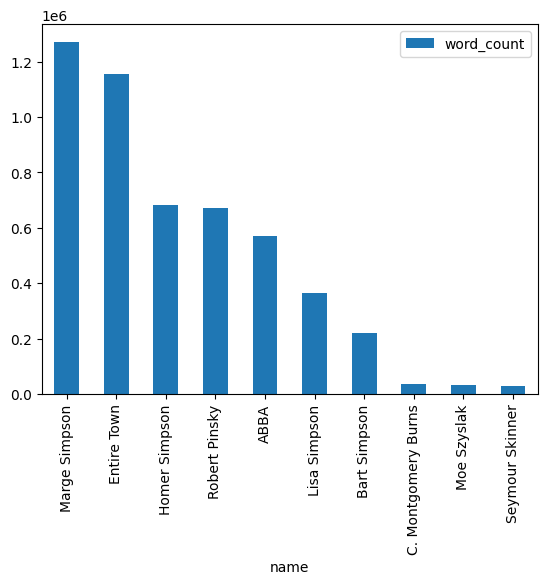

In [7]:
# First plot: Top 10 characters by word count
# Hint: Try to use the integration of matplotlib and pandas to directly plot from a dataframe.
top_characters_by_words.plot(kind="bar", x="name", y="word_count")
plt.show()

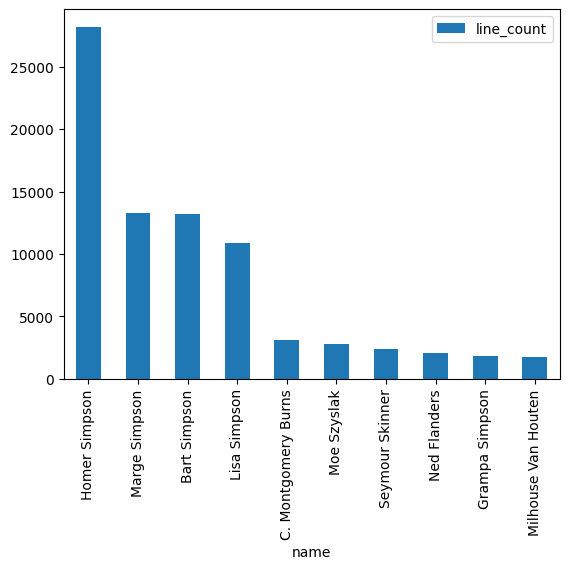

In [8]:
# Second plot: Top 10 characters by lines
top_characters_by_lines.plot(kind="bar", x="name", y="line_count")
plt.show()

Compare the results of the two plots: What do you notice? Do the results look correct to you?

### Your answer here
The fact the "Entire Town", "Rober Pinsky" and "ABBA" occur in the word_count graph but not in the line_count graph implies that, they have only a few but very long speech parts. This seems to be realistic, since they aren't main characters. 

### 3. Common Words (3 points)

We continue by examining the dialogues in more detail, by looking at the top 20 most commonly appearing words (tokens).

To generate a meaningful output, use the following pre-processing pipeline, parts of which were explained in more detail during the tutorials and the lecture:
- Use spaCy (`en_core_web_sm`) to process all text.
- Instead of considering the raw text, use the lemmatized token provided by spaCy.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

In [12]:
from collections import Counter
# Load the spacy model specified above. Make sure to disable the "ner" component for more speed.
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipe("ner")

word_list = []

# function to tokenize, filter and lemmatize text
def process_text(spoken_words: str):
    for token in nlp(str(spoken_words)):
        if not token.is_punct and not token.is_stop:
            word_list.append(token.lemma_)

# exclude all NaN values
df_script[df_script["spoken_words"].isna() == False].spoken_words.apply(process_text)

word_counter = Counter(word_list)
word_counter.most_common(20)

[('oh', 8467),
 ('like', 6263),
 ('go', 5463),
 ('know', 5456),
 ('get', 4905),
 ('hey', 4297),
 ('right', 4112),
 ('think', 4110),
 ('come', 4069),
 ('look', 3715),
 ('good', 3624),
 ('want', 3572),
 ('Bart', 3547),
 ('Homer', 3499),
 ('to', 3483),
 ('let', 3263),
 ('uh', 3066),
 ('yeah', 2978),
 ('time', 2749),
 ('man', 2644)]

Expected Result:
('oh', 8467),
 ('like', 6263),
 ('go', 5463),
 ('know', 5456),
 ('get', 4905),
 ('hey', 4297),
 ('right', 4112),
 ('think', 4110),
 ('come', 4069),
 ('look', 3715),
 ('good', 3624),
 ('want', 3572),
 ('Bart', 3547),
 ('Homer', 3499),
 ('to', 3483),
 ('let', 3263),
 ('uh', 3066),
 ('yeah', 2978),
 ('time', 2749),
 ('man', 2644)

Now plot a graph with the top 20 words on the x-axis and their respective frequencies on the y-axis, similar to the previous question.

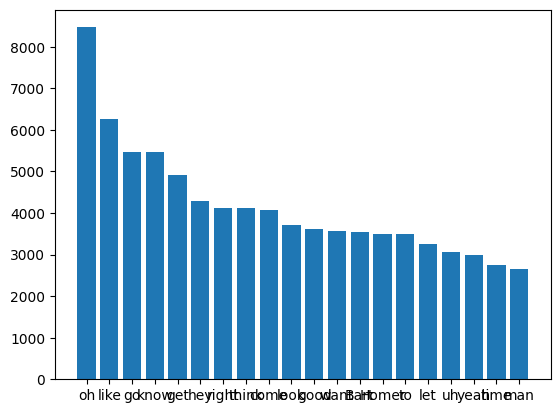

In [13]:
# Provide a plot of the frequencies of the most common 20 words.
plt.bar(list(zip(*word_counter.most_common(20)))[0], list(zip(*word_counter.most_common(20)))[1])
plt.show()

### 4. Named Entity Wordcloud (2 points)

Apply named entity recognition (NER) using SpaCy and generate a word cloud of the most commonly appearing 50
named entities that have the type `PERSON`. Visualize the resulting entities in a word cloud.
Take into account that you cannot simply use the 
output of the previous task, since NER was explicitly disabled.
 Since the named entity recognition takes quite some time, use only the first `10000` scripts.

In [14]:
# Load the English spacy model again, but this time do not disable the NER module.
nlp = spacy.load("en_core_web_sm")

# Extract named entities of the type "PERSON" from each script.
ne_string = ""
for script in df_script.spoken_words.tolist()[:10000]:
    doc = nlp(str(script))
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            # replace whitespaces. This way WordCloud does not cut them apart
            ne_string += str(ent.text).replace(" ", "_") + " "

To visualize the word cloud, you may use the `wordcloud` package, which works in combination with `matplotlib`. Make sure to limit the number of visible words to 50, and the maximum font size to 60.

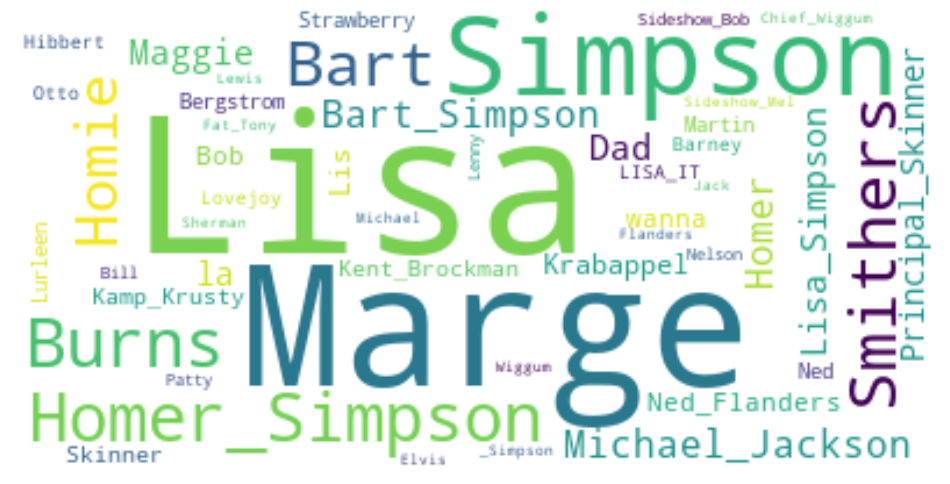

In [15]:
# Create matplotlib skeleton for word cloud figure
fig = plt.figure(1, figsize=(12,12))
plt.axis("off")

cloud = WordCloud(background_color="white", collocations=False, max_words=50).generate(ne_string)

plt.imshow(cloud, interpolation="bilinear")

### 5. Normalized Word Importance with TF-IDF (6 points)

The top words so far seem not too informative. We wish to find out the importance of particular words for specific characters, by looking at normalized frequency counts.
As an example, we expect the younger Simpson family members to exhibit a disproportionate frequency for the word "mom" or "dad", compared to other characters.

We looked at the normalization through Term Frequency - Inverse Document Frequency (TF-IDF) in the lecture, which we will use here to investigate lines by `Lisa Simpson` and `Bart Simpson`.

In this case, each script line is a document for a certain character who spoke the words.
Use `CountVectorizer` and `TfidfTransformers` from the `scikit-learn` library. In addition, filter out stop words and words with a frequency of less than 5 occurrences from the analysis. Then plot the TF-IDF values for the top 10 words for Lisa and Bart as bar plots.

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

# Build corpus manually so we later know which matrix rows correspond to which character
corpus = list()
bart_lines = df_script[(df_script.raw_character_text == "Bart Simpson") & (df_script.spoken_words.isna() == False)].spoken_words.tolist()
num_bart_lines = len(bart_lines)
corpus += bart_lines
lisa_lines = df_script[(df_script.raw_character_text == "Lisa Simpson") & (df_script.spoken_words.isna() == False)].spoken_words.tolist()
num_lisa_lines = len(lisa_lines)
corpus += lisa_lines

# Add rows of the other characters, that actually have spoken text
corpus += df_script[(df_script.raw_character_text != "Lisa Simpson") & (df_script.raw_character_text != "Bart Simpson") & (df_script.spoken_words.isna() == False)].spoken_words.tolist()

print(f"Number of documents of Bart: {num_bart_lines}")
print(f"Number of documents of Lisa: {num_lisa_lines}")
print(f"Total number of documents: {len(corpus)}")

# Count term appearances
count_vectorizer = CountVectorizer(stop_words=nlp.Defaults.stop_words, min_df=5)
count_matrix = count_vectorizer.fit_transform(corpus)
id_term_dict = {id: term for (term, id) in count_vectorizer.vocabulary_.items()}
num_terms = count_matrix.shape[1]
print(f"Total number of terms: {num_terms}")

# Calculate tf-idf values
tf_idf_transformer = TfidfTransformer()
tf_idf_matrix = tf_idf_transformer.fit_transform(count_matrix).toarray()

# sum up tf-idf values of Bart
bart_tf_idf_values = [0 for i in range(num_terms)]
for i in range(num_bart_lines):
    bart_tf_idf_values += tf_idf_matrix[i]

# sum up tf-idf values of Lisa
lisa_tf_idf_values = [0 for i in range(num_terms)]
for i in range(num_lisa_lines):
    lisa_tf_idf_values += tf_idf_matrix[num_bart_lines + i]

bart_top_term_ids = np.argsort(bart_tf_idf_values)[-10:]
bart_top_terms = [id_term_dict[term_id] for term_id in bart_top_term_ids]
bart_top_tf_idf = [bart_tf_idf_values[term_id] for term_id in bart_top_term_ids]
lisa_top_term_ids = np.argsort(lisa_tf_idf_values)[-10:]
lisa_top_terms = [id_term_dict[term_id] for term_id in lisa_top_term_ids]
lisa_top_tf_idf = [lisa_tf_idf_values[term_id] for term_id in lisa_top_term_ids]

Number of documents of Bart: 13013
Number of documents of Lisa: 10769
Total number of documents: 132112


c:\Users\nicoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  % sorted(inconsistent)


Total number of terms: 11045


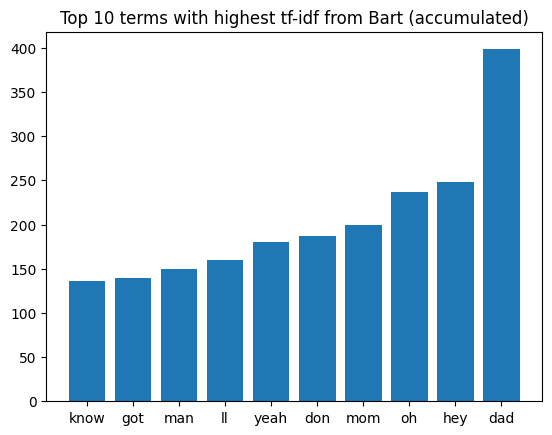

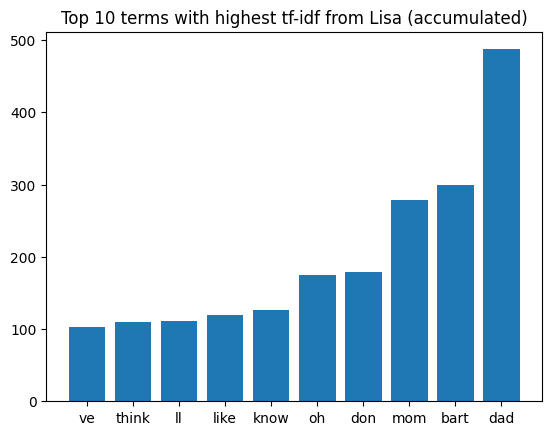

In [77]:
plt.bar(bart_top_terms, bart_top_tf_idf)
plt.title("Top 10 terms with highest tf-idf from Bart (accumulated)")
plt.show()
plt.bar(lisa_top_terms, lisa_top_tf_idf)
plt.title("Top 10 terms with highest tf-idf from Lisa (accumulated)")
plt.show()

Do your results look correct? Yes
Note: A normalization of the accumulated tf-idf values(which could make sense, because each character has a different number of lines) does not make sense, since we don't compare these values across character.

### Your answer here

By using `CountVectorizer` over the concatenation of all character-specific lines, we can then also compute a (non-normalized) document similarity between the lines of Lisa and Bart. Use cosine similarity over the two document vectors to compare the similarity.

For the `CountVectorizer`, use the same arguments as before (minimum 5 occurrences and no stop words).

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

# Generate concatenated strings for all characters
# TAKES ABOUT A MINUTE!!!
df_characters["all_speech"] = df_characters.name.apply(lambda character_name: " ".join(df_script[df_script.raw_character_text == character_name].spoken_words.apply(str).tolist()))

# Build corpus manually again, to we later know which document corresponds to which character
corpus = list()
corpus += df_characters[df_characters.name == "Bart Simpson"].all_speech.tolist()
corpus += df_characters[df_characters.name == "Lisa Simpson"].all_speech.tolist()
corpus += df_characters[(df_characters.name != "Bart Simpson") & (df_characters.name != "Lisa Simpson")].all_speech.tolist()

In [83]:
# Calculate Similarity
cv = CountVectorizer(min_df=5, stop_words=nlp.Defaults.stop_words)
count_matrix = cv.fit_transform(corpus)
tf_idf_transformer = TfidfTransformer()
tf_idf_matrix = tf_idf_transformer.fit_transform(count_matrix)

print(f"Similarity between Bart's and Lisa's spoken text: {cosine_similarity(tf_idf_matrix[0], tf_idf_matrix[1])}")

c:\Users\nicoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  % sorted(inconsistent)


Similarity between Bart's and Lisa's spoken text: [[0.86171772]]


### 6. NNMF Topics (5 points)

Uncover interesting topics by using non-negative matrix factorization (NNMF or NMF).

Use the `NMF` implementation from `sklearn` to detect the topics in the scripts, and use text cleaning steps similar to the first task. However, this time perform no lemmatization:
- Use spaCy (`en_core_web_sm`) to process all text.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

Set the `max_features` of `CountVectorizer` to 10,000 and `random_state` of the `NMF` to 42, and `n_components=10`.

In [84]:
from sklearn.decomposition import NMF 

In [85]:
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipe("ner")

df_script["cleaned_text"] = df_script.spoken_words.apply(lambda text: " ".join(token.text for token in nlp(str(text)) if not token.is_stop and not token.is_punct))
all_script_lines_list = df_script.cleaned_text.tolist()

cv = CountVectorizer(input=all_script_lines_list, max_features=10000)
matrix = cv.fit_transform(all_script_lines_list)

In [86]:
model = NMF(n_components=10, random_state=42)
document_topic_matrix = model.fit_transform(matrix)
topic_term_matrix = model.components_

c:\Users\nicoh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [87]:
def show_topics(components,num_top_words,vocab):
    #for each component or topic sorts the row values from large to small and 
    # returns the top words as the representation of the topic.
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in components])
    return [' '.join(t) for t in topic_words]

Use the `show_topics` method to show the top-20 words for the top 2 topics.

In [102]:
print(topic_term_matrix.shape)
print(topic_term_matrix[:2,:].shape)
print(show_topics(topic_term_matrix[:2,:], 20, list(cv.vocabulary_.keys())))

(10, 10000)
(2, 10000)
['ribs drederick wax gross plotting hens bikini growing tatum heavyweight janitor fattest oldest tire anniversary nyah earned trophy mop splashmore', 'tomato matrimony deacon unicorn agh earn pyramid pause curling greatly madman rehearse lunatic doo smite height strawberry gettin mojo grid']


## Question 2-2: Boosting results in Elasticsearch (1 + 9 + 2 = 12 points)

Before you start, make sure to download the file `test_data.json`, available on [Moodle](https://moodle.uni-heidelberg.de/pluginfile.php/1006481/mod_label/intro/test-data.json). This question assumes you have a running installation of Elasticsearch 7.X on your machine. If not, make sure to follow the steps detailed in the first tutorial to set up an instance. To complete the following questions, you will have to adjust the given URLs with your own settings. Look out for mentions of `<login>`, `<password>` and `<port>` and replace them accordingly.

Bulk load the content of `test_data.json` into an index called `dishes`. You may use the following shell command:

```bash
curl -u <login>:<password> -H "Content-Type:application/x-ndjson" -XPOST http://localhost:<port>/dishes/_bulk --data-binary "@test_data.json"
```
1. Provide a command to extract the dynamic mapping that is created in this scenario. Make sure that the output mapping is included in your solution (potentially pasting it into another cell or execute through the ).

### Insert your answer here
Hint: Consider using the option `?pretty` for legible outputs

2. Write queries to the `dishes` index given the specified criteria. The matching documents should be included in your solution, including their respective scores.

a) Return all dishes that have a preparation time of less than 15 minutes

### Insert your answer here

b) All dishes that contain `spaghetti` in the title.

### Insert your answer here

c) All dishes that received at least one 5-star rating and were created after 2016.

### Insert your answer here

d) Dishes that serve between 6 to 8 people.

### Insert your answer here

e) Dishes that mention both of the phrases "pasta" and "parmigiano" in the instructions.

### Insert your answer here

f) All recipes that require more than 10 ingredients

### Insert your answer here

g) Extend your query from b), such that it searches for `spaghetti` in both the title *and* description field. Occurrences in the title field should be boosted by a factor of 3.

### Insert your answer here

3. The default analyzer might not be perfect for working with recipe data. Provide the definition of a custom analyzer which adheres to the following specifications:
   
   - It performs *no* stop word filtering.
   - It applies stemming to all tokens.
   - It does *not* lowercase tokens, but keeps the original case of letters.

### Insert your answer here

## Question 2-3: Document Representations (2 + 2 + 3 = 7 points)

Please fill out the answers directly in the provided fields.

#### a) Why is it preferable to use cosine distance over Euclidean distance when computing document similarity?

Answer: When the documents are represented in tf-idf vector form, the direction they point to, can be interpreted as a metric that gives the topic(s) of the document. The length/norm of the vectors simply shows how clearly the document deals with its topics in respect to the other documents in the corpus. Thus the direction the vector points to is far more indicative of the content of the document then its length/norm is. If we are to choose the cosine distance over the euclidean distance we give the angle(direction) of the vectors a higher importance than their length

#### b) Identify two shortcomings of Bag-of-Word-based document representations

Answer:
1. A BoW can't save the order of the words. This leads to a massive loss in semantics. Furthermore it makes pos and other analysis tasks(e.g. sentiment analysis) harder or even impossible.
2. 

#### c) Find the singular value decomposition of the following matrix:

$A = \left[ \begin{matrix}1&-1\\ -2&2\\ 2&-2\end{matrix} \right]$.


Answer: